In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
df_tracks = pd.read_csv('tracks.csv')

In [2]:
def load_jsonl(path):
    with open(path, 'r', encoding='utf-8') as infile:
        for line in infile:
            yield json.loads(line.strip())

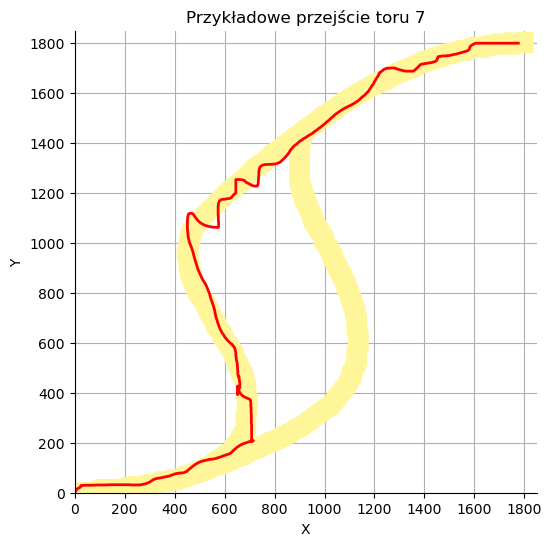

In [ ]:
track_id = 7
input_path = f"../filtered_data/filtered_records_{track_id}_metrics.jsonl"

gen = load_jsonl(input_path)

count = 0
max_plots = 1

for record in gen:
    if (
        record.get('Completed', False)
        and record.get('track_Difficulty_Level', -1) == 0  # filtr trudności
    ):
        track = record.get('Points', {})

        if isinstance(track, dict) and '__pd_dataframe__' in track:
            columns = track['columns']
            data = track['data']

            df = pd.DataFrame(data, columns=columns)

            if 'X' in df.columns and 'Y' in df.columns:
                # === Rysowanie ===
                plt.figure(figsize=(8, 6))
                ax = plt.gca()
                ax.set_aspect('equal', adjustable='box')

                ax.set_xlim(0, 1850)
                ax.set_ylim(0, 1850)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)

                # Rysowanie toru
                track_types = len(df_tracks[df_tracks['track_id'] == track_id]['track_type'].unique().tolist())
                for j in range(track_types):
                    temp = df_tracks[(df_tracks['track_id'] == track_id) & (df_tracks['track_type'] == j + 1)]
                    ax.plot(temp['x'], temp['y'], linewidth=15, alpha=1, color='#FFF699')

                # Oś
                ax.set_xticks([i for i in range(0, 1801, 200)])
                ax.set_yticks([i for i in range(0, 1801, 200)])

                # Tytuł i etykiety
                plt.xlabel("X")
                plt.ylabel("Y")
                plt.title(f"Przykładowe przejście toru {track_id}")

                # Rysowanie trasy gracza
                plt.plot(df['X'], df['Y'], linestyle='-', color='r', linewidth=2)

                plt.grid(True)
                plt.show()

                count += 1
                if count >= max_plots:
                    break


In [44]:
for track_id in range(1, 8):

    records = load_jsonl(f"../filtered_data/filtered_records_{track_id}_metrics_lvl_0.jsonl")
    df = pd.DataFrame(records)

    total = len(df)
    completed = df['track_Completed'].sum()
    percent_completed = round(completed / total * 100, 2)

    # Czasy w sekundach
    avg_completion_time = df[df['track_Completed'] == True]['track_Time'].mean() / 1000
    avg_track_time = df['track_Time'].mean() / 1000

    # Średni procent ukończenia gry
    avg_completion_percent = df['track_Completion_percent'].mean() * 100

    # Tabela wyników
    summary = pd.DataFrame({
        'Statystyka': [
            "Liczba wszystkich gier",
            "Liczba ukończonych gier",
            "Procent ukończonych gier",
            "Średni czas gry (s)",
            "Średni czas ukończonej gry (s)",
            "Średni procent ukończenia gry"
        ],
        'Wartość': [
            total,
            completed,
            f"{percent_completed}%",
            round(avg_track_time, 2),
            round(avg_completion_time, 2),
            f"{round(avg_completion_percent, 2)}%"
        ]
    })
    print(f"TOR {track_id}")
    print(summary.to_markdown(index=False))

TOR 1
| Statystyka                     | Wartość   |
|:-------------------------------|:----------|
| Liczba wszystkich gier         | 19631     |
| Liczba ukończonych gier        | 7936      |
| Procent ukończonych gier       | 40.43%    |
| Średni czas gry (s)            | 24.7      |
| Średni czas ukończonej gry (s) | 45.44     |
| Średni procent ukończenia gry  | 62.16%    |
TOR 2
| Statystyka                     | Wartość   |
|:-------------------------------|:----------|
| Liczba wszystkich gier         | 22999     |
| Liczba ukończonych gier        | 8079      |
| Procent ukończonych gier       | 35.13%    |
| Średni czas gry (s)            | 21.66     |
| Średni czas ukończonej gry (s) | 44.4      |
| Średni procent ukończenia gry  | 52.58%    |
TOR 3
| Statystyka                     | Wartość   |
|:-------------------------------|:----------|
| Liczba wszystkich gier         | 20679     |
| Liczba ukończonych gier        | 8842      |
| Procent ukończonych gier       | 42.76% 

In [5]:
records = load_jsonl(f"../filtered_data_useful_columns/filtered_records_1_to_7_metrics.json")
df = pd.DataFrame(records)

total = len(df)
completed = df['track_Completed'].sum()
percent_completed = round(completed / total * 100, 2)

# Czasy w sekundach
avg_completion_time = df[df['track_Completed'] == True]['track_Time'].mean() / 1000
avg_track_time = df['track_Time'].mean() / 1000

# Średni procent ukończenia gry
avg_completion_percent = df['track_Completion_percent'].mean() * 100

# Tabela wyników
summary = pd.DataFrame({
    'Statystyka': [
        "Liczba wszystkich gier",
        "Liczba ukończonych gier",
        "Procent ukończonych gier",
        "Średni czas gry (s)",
        "Średni czas ukończonej gry (s)",
        "Średni procent ukończenia gry"
    ],
    'Wartość': [
        total,
        completed,
        f"{percent_completed}%",
        round(avg_track_time, 2),
        round(avg_completion_time, 2),
        f"{round(avg_completion_percent, 2)}%"
    ]
})

In [6]:
print(summary.to_markdown(index=False))

| Statystyka                     | Wartość   |
|:-------------------------------|:----------|
| Liczba wszystkich gier         | 64704     |
| Liczba ukończonych gier        | 25533     |
| Procent ukończonych gier       | 39.46%    |
| Średni czas gry (s)            | 20.49     |
| Średni czas ukończonej gry (s) | 38.54     |
| Średni procent ukończenia gry  | 58.67%    |


In [43]:
records = load_jsonl(f"../filtered_data/filtered_records_5_metrics.jsonl")
df = pd.DataFrame(records)

# Wyświetl unikalne wartości poziomu trudności
unique_difficulties = df['track_Difficulty_Level'].unique()
print("Unikalne poziomy trudności:", unique_difficulties)
print("\nLiczba rekordów dla każdego poziomu trudności:")
print(df['track_Difficulty_Level'].value_counts())

Unikalne poziomy trudności: [1 0]

Liczba rekordów dla każdego poziomu trudności:
track_Difficulty_Level
1    12921
0      291
Name: count, dtype: int64


In [ ]:
track_id = 7
input_path = f"../filtered_data/filtered_records_{track_id}_metrics.jsonl"

gen = load_jsonl(input_path)

count = 0
max_plots = 1

for record in gen:
    if (
        record.get('Completed', False)
        and record.get('track_Difficulty_Level', -1) == 0  # filtr trudności
    ):
        track = record.get('Points', {})

        if isinstance(track, dict) and '__pd_dataframe__' in track:
            columns = track['columns']
            data = track['data']

            df = pd.DataFrame(data, columns=columns)

            if 'X' in df.columns and 'Y' in df.columns:
                # === Rysowanie ===
                plt.figure(figsize=(8, 6))
                ax = plt.gca()
                ax.set_aspect('equal', adjustable='box')

                ax.set_xlim(0, 1850)
                ax.set_ylim(0, 1850)
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)

                # Rysowanie toru
                track_types = len(df_tracks[df_tracks['track_id'] == track_id]['track_type'].unique().tolist())
                for j in range(track_types):
                    temp = df_tracks[(df_tracks['track_id'] == track_id) & (df_tracks['track_type'] == j + 1)]
                    ax.plot(temp['x'], temp['y'], linewidth=15, alpha=1, color='#FFF699')

                # Oś
                ax.set_xticks([i for i in range(0, 1801, 200)])
                ax.set_yticks([i for i in range(0, 1801, 200)])

                # Tytuł i etykiety
                plt.xlabel("X")
                plt.ylabel("Y")
                plt.title(f"Przykładowe przejście toru {track_id}")

                # Rysowanie trasy gracza
                plt.plot(df['X'], df['Y'], linestyle='-', color='r', linewidth=2)

                plt.grid(True)
                plt.show()

                count += 1
                if count >= max_plots:
                    break

In [52]:
for track_id in range(2, 8):

    # === Wczytywanie pliku z rekordami ===
    input_path = f"../filtered_data/filtered_records_{track_id}_metrics_lvl_0.jsonl"
    filtered_records = []

    with open(input_path, "r", encoding="utf-8") as f:
        for line in f:
            record = json.loads(line)
            if record.get("track_Completion_percent", 0) >= 0.5:
                smooth = record.get("smoothness")
                stair = record.get("stair_ratio")
                points = record.get("Points")
                if smooth is not None and stair is not None and isinstance(points, dict):
                    filtered_records.append({
                        "ID": record.get("ID"),
                        "track_ID": record.get("track_Track_ID"),
                        "smoothness": smooth,
                        "stair_ratio": stair,
                        "points": points
                    })

    df = pd.DataFrame(filtered_records)

    # === Znalezienie rekordów ekstremalnych ===
    record_max_smooth = df.loc[df['smoothness'].idxmax()]
    record_min_smooth = df.loc[df['smoothness'].idxmin()]
    record_max_stair = df.loc[df['stair_ratio'].idxmax()]
    record_min_stair = df.loc[df['stair_ratio'].idxmin()]

    # === Wczytaj dane toru (df_tracks musi być wcześniej załadowany) ===
    df_tracks = pd.read_csv("tracks.csv")  # Zmień ścieżkę jeśli inna

    # === Folder do zapisu ===
    output_dir = "plots_extremes"
    os.makedirs(output_dir, exist_ok=True)

    # === Funkcja do rysowania i zapisywania wykresu ===
    def save_trajectory_plot(record, title, color, filename):
        track_id = record['track_ID']
        df_points = pd.DataFrame(record['points']['data'])

        plt.figure(figsize=(8, 6))
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        ax.set_xlim(0, 1850)
        ax.set_ylim(0, 1850)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Rysowanie toru
        track_types = df_tracks[df_tracks['track_id'] == track_id]['track_type'].unique()
        for ttype in track_types:
            temp = df_tracks[(df_tracks['track_id'] == track_id) & (df_tracks['track_type'] == ttype)]
            ax.plot(temp['x'], temp['y'], linewidth=15, alpha=1, color='#FFF699')

        # Oś siatki
        ax.set_xticks([i for i in range(0, 1801, 200)])
        ax.set_yticks([i for i in range(0, 1801, 200)])

        # Trajektoria kulki
        ax.plot(df_points['X'], df_points['Y'], linestyle='-', color=color, linewidth=2)

        plt.xlabel("X")
        plt.ylabel("Y")
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, filename), dpi=300)
        plt.close()

    # === Zapis wykresów ===
    output_dir = "app_plots"
    os.makedirs(output_dir, exist_ok=True)

    save_trajectory_plot(record_max_smooth, f"Max Smoothness\n{record_max_smooth['smoothness']:.4f}", "red",
                        f"max_smoothness_{track_id}.png")
    save_trajectory_plot(record_min_smooth, f"Min Smoothness\n{record_min_smooth['smoothness']:.4f}", "red",
                        f"min_smoothness_{track_id}.png")
    save_trajectory_plot(record_max_stair, f"Max Stair Ratio\n{record_max_stair['stair_ratio']:.4f}", "red",
                        f"max_stair_ratio_{track_id}.png")
    save_trajectory_plot(record_min_stair, f"Min Stair Ratio\n{record_min_stair['stair_ratio']:.4f}", "red",
                        f"min_stair_ratio_{track_id}.png")


In [ ]:
# wypisz klucze dla pliku 